In [1]:
%matplotlib widget
import matplotlib.pyplot as plt 
import numpy as np
import ipywidgets as widgets

plt.ion()

<h3 style="background :Red; padding: 1%!important;"> 1. Házi feladat. (2 pont)</h3>

Pistike egy bankban pénzt szeretne lekötni $1000$ lej értékben, $50$ évre, a kamatláb $0.75\%$.
- Készíts egy grafikont, ami megadja, hogy melyik évben mennyi pénze lesz Pistikének, ha egyszerű kamattal, illetve kamatos kamattal köti le pénzét! 
- Az ábrán jelmagyarázatban (legend) tüntesd fel, hogy melyik görbe melyik kamatozásnak felel meg!
- Mindkét esetben írasd ki az 50 év utáni összeget!

1375.0
1452.956929863411


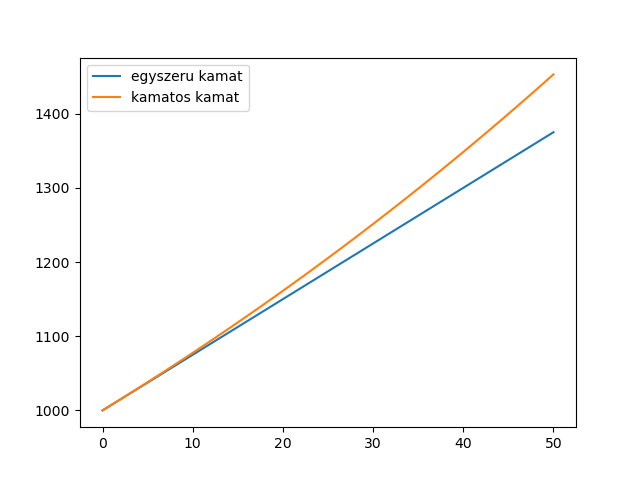

In [15]:
fig, ax = plt.subplots()
start = 1000
time = 50
interest = 0.0075
def interest1():
    money = [start]
    for i in range(1, time + 1):
        money.append(money[i-1] + start*interest)
    timestamps = [i for i in range(time + 1)]
    ax.plot(timestamps, money, label="egyszeru kamat")
    ax.legend()
    print(money[len(money)-1])

def interest2():
    money = [start]
    for i in range(1, time + 1):
        money.append(money[i-1] + money[i-1]*interest)
    timestamps = [i for i in range(time + 1)]
    ax.plot(timestamps, money, label="kamatos kamat")
    ax.legend()
    print(money[len(money)-1])

interest1()
interest2()

<h3 style="background :Red; padding: 1%!important;"> 2. Házi feladat. (2 pont)</h3>

Adott egy baktérium populáció, amelyben kezdetben $10^5$ darab egyed van. A baktériumok osztódással szaporodnak és ideális körülmények között óránként kettéosztódnak.
- Készíts egy grafikont, amelyen a baktériumok számát jeleníted meg az első $24$ órában!  
- Az ábrán az előbbi grafikon mellett a logisztikus esetnek megfelelő grafikont is jelenítsd meg, amikor az élettér maximális befogadóképessége $10^{10}$.

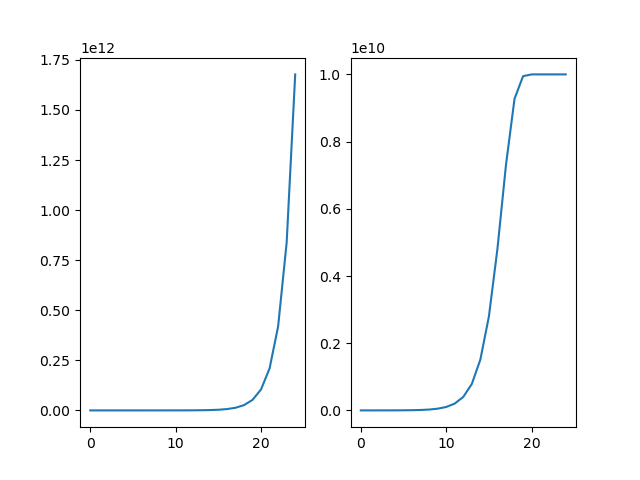

In [16]:
fig2, (ax2, ax3) = plt.subplots(1, 2)
start = 1e5
time = 24
max = 1e10
def exponential():
    x = [start]
    for i in range(1, time + 1):
        x.append(2*x[i-1])
    ax2.plot([i for i in range(0, time + 1)], x)

def logistical():
    x = [start]
    for i in range(1, time + 1):
        x.append(x[i-1] * (1 - x[i-1] / max) + x[i-1])
    ax3.plot([i for i in range(0, time + 1)], x)

exponential()
logistical()

<h3 style="background :Red; padding: 1%!important;"> 3. Házi feladat. (2 pont)</h3>

Készíts egy ábrát, amelyen megjeleníted a (3)-as egyenlettel megadott $U_n$ sorozat $U_0,U_1,\dots, U_{100}$ tagjait!  
Az $U_0\in(0,1)$ és a $k\in(0,4)$ értékét ```interact``` segítségével lehessen változtatni $0{,}01$-essével!  
Az $U_0$ értéke alapértelezetten legyen $0{,}5$. 

interactive(children=(FloatSlider(value=2.0, description='k', max=4.0), FloatSlider(value=0.5, description='u0…

<function __main__.discrete_logistical(k, u0=0.5)>

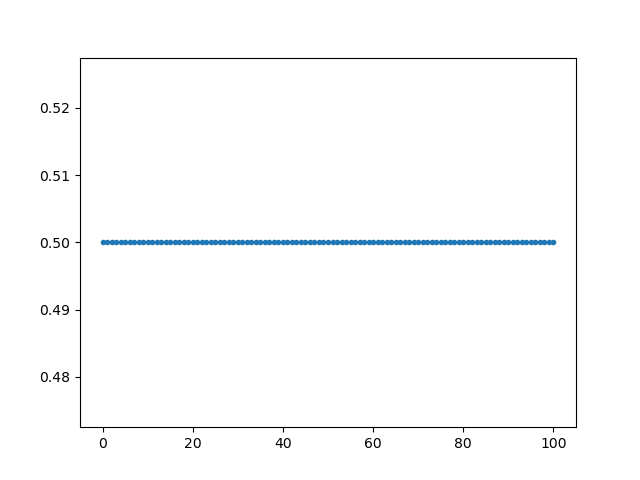

In [2]:
fig3, ax4 = plt.subplots()
time = 100

def discrete_logistical(k, u0 = 0.5):
    ax4.cla()
    u = [u0]
    for i in range(1, time + 1):
        u.append(k * u[i-1] * (1 - u[i-1]))
    ax4.plot([i for i in range(time + 1)], u, '.')

widgets.interact(discrete_logistical, k=(0, 4, 0.1), u0=(0, 1, 0.1))

<h3 style="background :Red; padding: 1%!important;"> 4. Házi feladat. (2 pont)</h3>

    
Készítsd el a diszkrét logisztikus egyenlet bifurkációs digrammját! 

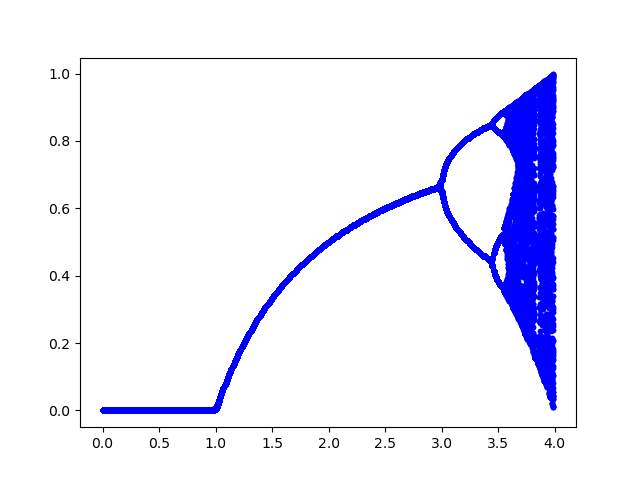

In [18]:
fig4, ax5 = plt.subplots()
u0 = 0.5
def bifurcation_diagram():
    for index in range(0, 400):
        k = index / 100
        u = [u0]
        for i in range(400):
            u.append(k * u[i-1] * (1 - u[i-1]))
        u = u[200:400]
        ax5.plot([k]*len(u), u, 'b.')

bifurcation_diagram()

<h3 style="background :Red; padding: 1%!important;"> 5. Házi feladat. (2 pont)</h3>


Készíts egy ábrát, amelyen az $U_{n+1}=k\cdot U_n\cdot (1-U_n)$ sorozathoz rendelt pókháló diagramot jeleníted meg!  
Az $U_0\in(0,1)$ és $k\in(0,4)$ értékét ```interact``` segítségével lehessen változtatni $0{,}01$-essével!  
Az $U_0$ alapértelezetten legyen $0{,}5$.

interactive(children=(FloatSlider(value=2.0, description='k', max=4.0, step=0.01), FloatSlider(value=0.5, desc…

<function __main__.spiderweb(k, u0=0.5)>

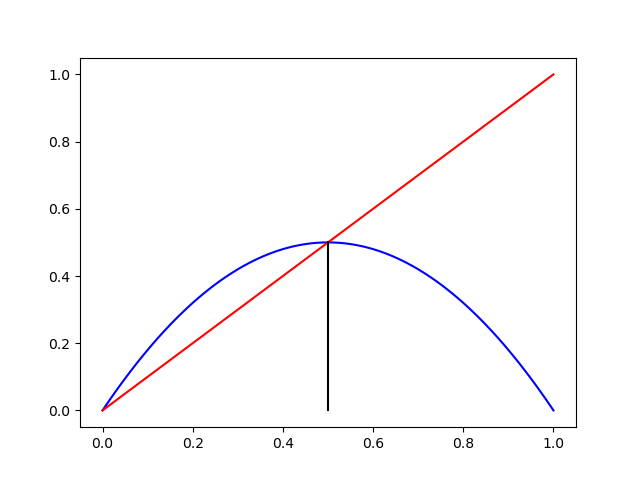

In [19]:
fig5, ax6 = plt.subplots()

def spiderweb(k, u0=0.5):
    ax6.cla()
    x = np.linspace(0, 1, 100)
    y = k * x * (1-x)
    ax6.plot(x, y, 'b-')
    ax6.plot(x, x, 'r-')
    x = u0
    y = 0
    for i in range(100):
        new_x = x
        new_y = k * x * (1-x)
        ax6.plot([x, new_x], [y, new_y], 'k-')
        x = new_y
        y = new_y
        ax6.plot([x, new_x], [y, new_y], 'k-')

widgets.interact(spiderweb, k=(0, 4, 0.01), u0=(0, 1, 0.01))

<h3 style="background :Red; padding: 1%!important;"> 6. Házi feladat. (+2 pont)</h3>

Tanulmányozd a $V_0=1$, $V_{n+1}=k\cdot  \sin(V_n)$ sorozat viselkedését, ahol $k\in (0,\pi)$ és $V_n\in(0,\pi)$, minden $n\in\mathbb{R}$ esetén.
- Készíts bifurkációs diagramot.
- Találj egy-egy olyan $k$ értéket (a bifurkációs diagramm alapján), amelyre a sorozat konvergens, 2-periodikus, 4-periodikus, illetve kaotikus, majd mind a négy esetben készíts egy pókháló ábrát, amelyről leolvasható a megfelelő sorozat természete.

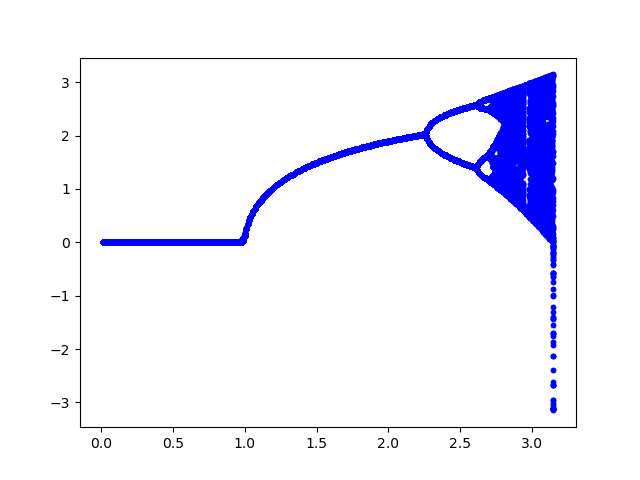

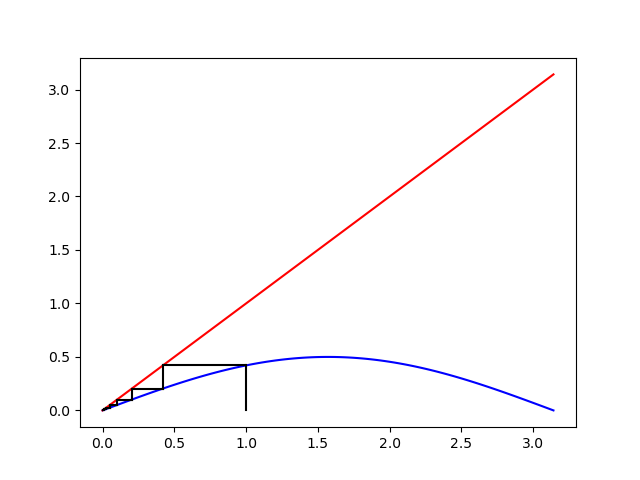

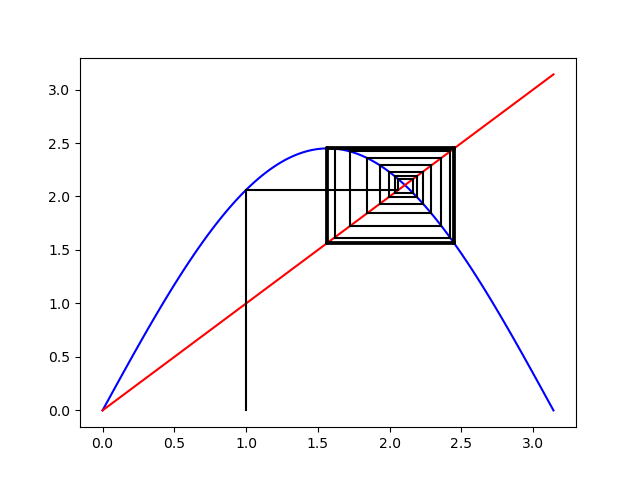

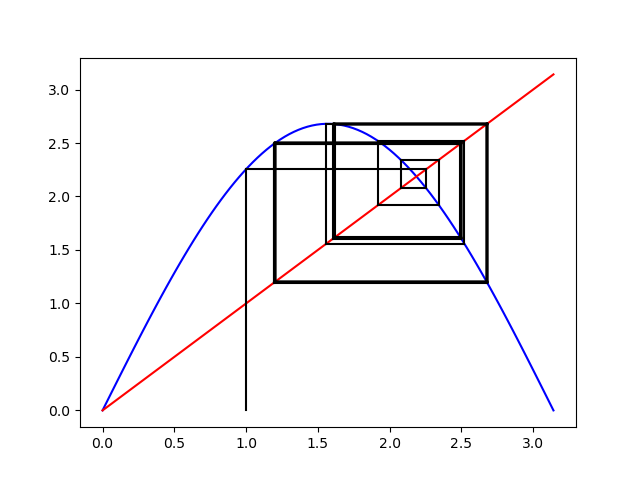

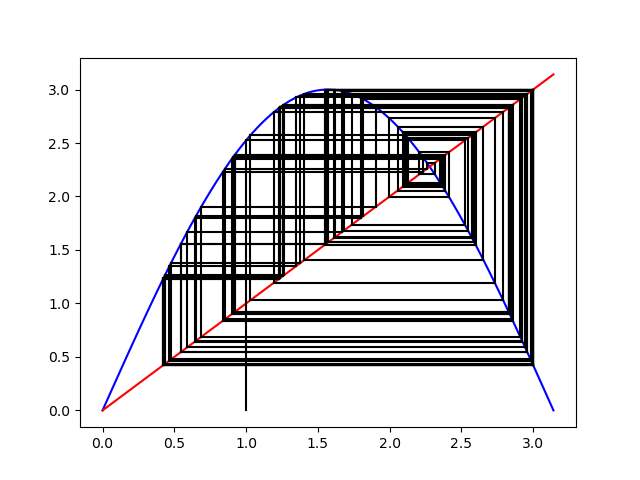

In [20]:
fig6, ax7 = plt.subplots()
v0 = 1

def extra_bifurcation_diagram():
    k = 0
    while k < np.pi:
        k = k + 0.01
        v = [v0]
        for i in range(400):
            v.append(k * np.sin(v[i-1]))
        v = v[200:400]
        ax7.plot([k]*len(v), v, 'b.')

def draw_spiderweb(k, ax_):
    x = np.linspace(0, np.pi, 100)
    y = k * np.sin(x)
    ax_.plot(x, y, 'b-')
    ax_.plot(x, x, 'r-')
    x = v0
    y = 0
    for i in range(100):
        new_x = x
        new_y = k * np.sin(x)
        ax_.plot([x, new_x], [y, new_y], 'k-')
        x = new_y
        y = new_y
        ax_.plot([x, new_x], [y, new_y], 'k-')

extra_bifurcation_diagram()

fig7, ax8 = plt.subplots()
draw_spiderweb(0.5, ax8)

fig7, ax9 = plt.subplots()
draw_spiderweb(2.45, ax9)

fig7, ax10 = plt.subplots()
draw_spiderweb(2.68, ax10)

fig7, ax11 = plt.subplots()
draw_spiderweb(3, ax11)